<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# импортирую библиотеку pandas как главного инструмента для решения поставленных задач
import pandas as pd
# импортирую библиотеку seaborn как главного инструмента для визуализации
import seaborn as sns
# импортирую библиотеку matplotlib
import matplotlib.pyplot as plt

In [2]:
# открываем файл
df = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
# начинаем изучать файлы
df.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


In [4]:
# добавляем функции read_csv() аргумент sep='\t' и сохраняем этот результат
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [5]:
# посмотрим еще раз на первые 15 строк датафрейма
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
# посмотрим, для более полного первичного представления о датафрейме, последние его 15 строк
df.tail(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23686,8,3300000.0,31.00,2017-04-29T00:00:00,1,2.55,9.0,18.0,6,NaN,...,6.50,0.0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23687,6,3200000.0,39.00,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,...,15.00,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0


In [7]:
# пришло время получить общую информацию о данных в таблице df
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

**Описание данных из условия проектной работы:**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (обжект!)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

**Анализируя полученную информацию устанавливаем следующее описание датафрейма:**

1. В столбце 'ceiling_height' из должных 23699 данных есть 14504 данных, в 'floors_total' из должных 23699 данных представлены 23613б, в living_area из должных 23699 данных указаны 21796 данных, is_apartment включает всего - 2775 данных, kitchen_area всего 21421, balcony всего 12180, аналогичная ситуация в столбцах locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, parks_nearest, ponds_around3000,ponds_nearest, days_exposition.
2. в таблице двадцать два столбца (22) и 23699 строк. Тип данных в 3-х столбцах — object. Тип данных в 3-х столбцах - int64. В 14-ти столбцах тип данных - float64, тип булевых значений в 2-х столбцах (studio, open_plan). Особенное внимание обращают типы данных в следующих столбцах: 
 - parks_around3000 - тип данных указан float64. Очевидно, что наиболее подходящий тип данных по данному значению int64.
 - balcony - тип данных указан float64. Очевидно, что наиболее подходящий тип данных по данному значению int64.
 - is_apartment - тип данных указан object. Очевидно, что наиболее подходящий тип булевых данных.
 - floors_total - тип данных указан float64. Представляется, что наиболее подходящий тип данных int64.
 - first_day_exposition - тип данных указан object. Представляется, что наиболее подходящий тип данных date.

## Предобработка данных

In [8]:
 # проведем подсчёт пропусков
(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
# расчитаем общее количество 'NaN'  в дата фрейме
print('NaN occurrences in DataFrame:')
df.isna().sum().sum()

NaN occurrences in DataFrame:


101441

**Начнем с высоты потолков**

In [10]:
# убедимся, что 'NaN' содержится в столбце датафрейма 'ceiling_height' (высота потолков)
df['ceiling_height'].isna().sum()

9195

In [11]:
# предлагается заменить значения 'NaN' в столбце датафрейма 'ceiling_height' (высота потолков)  на медиану
# среднее арифметическое значение mean может исказить значения существенно и сделать расчеты недостоверными
median_ceiling_height = df['ceiling_height'].median(skipna=True)

In [12]:
df['ceiling_height'] = df.ceiling_height.fillna(median_ceiling_height)

In [ ]:
# убедимся, что 'NaN' заменен на медиану в столбце датафрейма 'ceiling_height'
df['ceiling_height'].isna().sum()

**Рассмотрим столбец с этажами в доме, если они конечно в доме есть.**

In [14]:
# убедимся, что 'NaN' содержится в столбце датафрейма 'floors_total' (всего этажей в доме)
df['floors_total'].isna().sum()

86

In [15]:
# посмотрим несколько строк где встречается NaN в столбце датафрейма 'floors_total' (всего этажей в доме)
df.query('floors_total == "NaN"').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


In [16]:
# предлагается заменить значения 'NaN' в столбце датафрейма 'floors_total' на среднее арифметические значения.
mean_floors_total = df['floors_total'].mean(skipna=True)

In [17]:
df['floors_total'] = df.floors_total.fillna(mean_floors_total)

In [18]:
# убедимся, что 'NaN' не содержится в столбце датафрейма 'floors_total' (всего этажей в доме)
df['floors_total'].isna().sum()

0

In [19]:
# подсчитаем на всякий случай количество строк где встрчаются пропущенные значения
print(len(df[df['floors_total'].isna()]))

0


In [20]:
# осуществим изменение типа данных с float64 на наиболее подходящий тип данных int64.
df[['floors_total']] = df[['floors_total']].astype(int)

In [21]:
# проверим смену типа данных в 'floors_total'
(df['floors_total']).dtypes

dtype('int64')

**Рассмотрим столбец living_area (жилая площадь в квадратных метрах (м²).**

In [22]:
# убедимся, что 'NaN' содержится в столбце датафрейма 'living_area' 
df['living_area'].isna().sum()

1903

In [23]:
# предлагается заменить значения 'NaN' в столбце датафрейма 'living_area' на медиану
median_living_area = df['living_area'].median(skipna=True)

In [24]:
df['living_area'] = df.living_area.fillna(median_living_area)

In [25]:
# убедимся, что 'NaN' заменен на медиану в столбце датафрейма 'living_area'
df['living_area'].isna().sum()

0

**Рассмотрим столбец is_apartment.** 

In [26]:
# убедимся, что 'NaN' содержится в столбце датафрейма is_apartment
df['is_apartment'].isna().sum()

20924

In [27]:
# рассмотрим уникальные значения в столбце 'is_apartment'
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [28]:
# заменяем значения NaN на False
df['is_apartment'] = df['is_apartment'].fillna(False)

In [29]:
# рассмотрим еще раз уникальные значения в столбце 'is_apartment'
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [30]:
# убедимся, что 'NaN' больше не содержится в столбце датафрейма is_apartment
df['is_apartment'].isna().sum()

0

In [31]:
# изменим тип данных int на более профильный тип для категориальных данных - bool
df[['is_apartment']] = df[['is_apartment']].astype(bool)

In [32]:
# проверим смену типа данных в 'is_apartment'
(df['is_apartment']).dtypes

dtype('bool')

**Рассмотрим столбец kitchen_area (площадь кухни в квадратных метрах (м²)**

In [33]:
# убедимся, что 'NaN' содержится в столбце датафрейма kitchen_area 
df['kitchen_area'].isna().sum()

2278

In [34]:
# предлагается заменить значения 'NaN' в столбце датафрейма 'kitchen_area' на медиану
median_kitchen_area = df['kitchen_area'].median(skipna=True)

In [35]:
df['kitchen_area'] = df.kitchen_area.fillna(median_kitchen_area)

In [36]:
# убедимся, что 'NaN' заменен на медиану в столбце датафрейма 'kitchen_area'
df['kitchen_area'].isna().sum()

0

**Рассмотрим столбец balcony (число балконов)**

In [37]:
# убедимся, что 'NaN' содержится в столбце датафрейма 'balcony'
df['balcony'].isna().sum()

11519

In [38]:
# далее рассмотрим уникальные значения в столбце датафрейма 'balcony'
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [39]:
# используем метод fillna и вставляем вместо NaN  нули
df['balcony'] = df['balcony'].fillna(0)

In [40]:
# изменим тип данных float на более профильный тип для подобных категориальных данных - int
df[['balcony']] = df[['balcony']].astype(int)

In [41]:
# далее рассмотрим повторно уникальные значения в столбце датафрейма 'balcony'
df['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

**Продолжим рассмотрение столбцов и следующий у нас locality_name (название населённого пункта).**

In [42]:
# убедимся, что 'NaN' содержится в столбце датафрейма 'locality_name'
df['locality_name'].isna().sum()

49

In [43]:
# удаляем 49 случаев с отсуствующими данными в названии населённого пункта
# указываем на значение TRUE, изменения сохраняются в новом объекте, который создается, и он не изменяет исходные данные.
# указываем axis = 0, чтобы работать с удалением строк! Критично важно!
df.dropna(subset=['locality_name'],inplace=True, axis=0)

In [44]:
# убедимся, что 'NaN' не содержится в столбце датафрейма 'locality_name'
df['locality_name'].isna().sum()

0

**Рассмотрим столбец 'airports_nearest' (расстояние до ближайшего аэропорта в метрах (м)**

In [45]:
# убедимся, что 'NaN' содержится в столбце датафрейма airports_nearest
df['airports_nearest'].isna().sum()

5534

In [46]:
# проверим тип данных в 'airports_nearest'
(df['airports_nearest']).dtypes

dtype('float64')

In [47]:
# предлагается заменить значения 'NaN' в столбце датафрейма 'airports_nearest' на среднее арифметические значения.
mean_airports_nearest = df['airports_nearest'].mean(skipna=True)

In [48]:
df['airports_nearest'] = df.airports_nearest.fillna(mean_airports_nearest)

In [49]:
# убедимся, что 'NaN' не содержится в столбце датафрейма airports_nearest
df['airports_nearest'].isna().sum()

0

**Рассмотрим следующий столбец cityCenters_nearest расстояние до центра города (м)**

In [50]:
# убедимся, что 'NaN' содержится в столбце датафрейма cityCenters_nearest
df['cityCenters_nearest'].isna().sum()

5511

In [51]:
# проверим тип данных в 'airports_nearest'
(df['cityCenters_nearest']).dtypes

dtype('float64')

In [52]:
# предлагается заменить значения 'NaN' в столбце датафрейма 'cityCenters_nearest' на среднее арифметические значения.
mean_cityCenters_nearest = df['cityCenters_nearest'].mean(skipna=True)

In [53]:
df['cityCenters_nearest'] = df.cityCenters_nearest.fillna(mean_cityCenters_nearest)

In [54]:
# убедимся, что 'NaN' не содержится в столбце датафрейма cityCenters_nearest
df['cityCenters_nearest'].isna().sum()

0

In [55]:
# добавим столбец id_client
df['id_client'] = df.reset_index().index

**Рассмотрим столбец parks_around3000 (число парков в радиусе 3 км)**

In [56]:
# убедимся, что 'NaN' содержится в столбце датафрейма parks_around3000
df['parks_around3000'].isna().sum()

5510

In [57]:
# далее рассмотрим уникальные значения в столбце датафрейма 'parks_around3000'
df['parks_around3000'].value_counts()

0.0    10080
1.0     5671
2.0     1744
3.0      645
Name: parks_around3000, dtype: int64

In [58]:
# используем метод fillna и вставляем вместо NaN  нули
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [59]:
# изменим тип данных float на более профильный тип для подобных категориальных данных - int
df[['parks_around3000']] = df[['parks_around3000']].astype(int)

In [60]:
# далее рассмотрим повторно уникальные значения в столбце датафрейма 'parks_around3000'
df['parks_around3000'].value_counts()

0    15590
1     5671
2     1744
3      645
Name: parks_around3000, dtype: int64

**Рассмотрим столбец "parks_nearest" (расстояние до ближайшего парка (м)**

In [61]:
# убедимся, что 'NaN' содержится в столбце датафрейма parks_nearest
df['parks_nearest'].isna().sum()

15586

In [62]:
# проверим тип данных в parks_nearest
(df['parks_nearest']).dtypes

dtype('float64')

In [63]:
# предлагается заменить значения 'NaN' в столбце датафрейма 'parks_nearest' на медиану
median_parks_nearest = df['parks_nearest'].median(skipna=True)

In [64]:
df['parks_nearest'] = df.parks_nearest.fillna(median_parks_nearest)

In [65]:
# убедимся, что 'NaN' заменен на медиану в столбце датафрейма parks_nearest
df['parks_nearest'].isna().sum()

0

**Рассмотрим столбец ponds_around3000 (число водоёмов в радиусе 3 км)**

In [66]:
# убедимся, что 'NaN' содержится в столбце датафрейма ponds_around3000
df['ponds_around3000'].isna().sum()

5510

In [67]:
# проверим тип данных в  ponds_around3000
(df['ponds_around3000']).dtypes

dtype('float64')

In [68]:
# далее рассмотрим уникальные значения в столбце датафрейма 
df['ponds_around3000'].value_counts()

0.0    9055
1.0    5702
2.0    1889
3.0    1494
Name: ponds_around3000, dtype: int64

In [69]:
# используем метод fillna и вставляем вместо NaN  нули
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [70]:
# изменим тип данных float на более профильный тип для подобных категориальных данных - int
df[['ponds_around3000']] = df[['ponds_around3000']].astype(int)

In [71]:
# далее повторно рассмотрим уникальные значения в столбце датафрейма 
df['ponds_around3000'].value_counts()

0    14565
1     5702
2     1889
3     1494
Name: ponds_around3000, dtype: int64

**Рассмотрим ponds_nearest (расстояние до ближайшего водоёма (м))**

In [72]:
# убедимся, что 'NaN' содержится в столбце датафрейма ponds_nearest
df['ponds_nearest'].isna().sum()

14565

In [73]:
# проверим тип данных в ponds_nearest
(df['ponds_nearest']).dtypes

dtype('float64')

In [74]:
# предлагается заменить значения 'NaN' в столбце датафрейма ponds_nearest на медиану
median_ponds_nearest = df['ponds_nearest'].median(skipna=True)

In [75]:
df['ponds_nearest'] = df.ponds_nearest.fillna(median_ponds_nearest)

In [76]:
# убедимся, что 'NaN' заменен на медиану в столбце датафрейма ponds_nearest 
df['ponds_nearest'].isna().sum()

0

**Рассмотрим последний столбец days_exposition сколько дней было размещено объявление (от публикации до снятия)**

In [77]:
# убедимся, что 'NaN' содержится в столбце датафрейма days_exposition 
df['days_exposition'].isna().sum()

3180

In [78]:
# проверим тип данных в days_exposition
(df['days_exposition']).dtypes

dtype('float64')

In [79]:
# предлагается заменить значения 'NaN' в столбце датафрейма ponds_nearest на медиану
median_days_exposition = df['days_exposition'].median(skipna=True)

In [80]:
df['days_exposition'] = df.days_exposition.fillna(median_days_exposition)

In [81]:
# убедимся, что 'NaN' заменен на медиану в столбце датафрейма ponds_nearest 
df['days_exposition'].isna().sum()

0

In [82]:
# изменим тип данных float на  int
df[['days_exposition']] = df[['days_exposition']].astype(int)

**Столбец 'first_day_exposition' переводим в тип данных date**

In [83]:
#переведем столбец с датой в формат даты без времени, посольку время не указано
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

In [84]:
# проверим тип данных в first_day_exposition
(df['first_day_exposition']).dtypes

dtype('<M8[ns]')

In [85]:
# пришло время посмотреть общую информацию о данных в таблице df с учетом проделанной работы по обработке данных
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null float64
ponds_around3

**Для чистоты работы попробуем посмотреть наличие дубликатов во фрейме данных**

In [86]:
# рассмотреим дата сет на предмет наличия явных дубликатов
(df.duplicated().sum())

0

In [87]:
# попробую удалить дубликаты, если они есть и потом сравнить.
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null float64
ponds_around3

## Расчёты и добавление результатов в таблицу

**Рассчитаем и добавим в таблицу: цену квадратного метра**

In [88]:
# предлагаемая формула:
df['price_per_square_meter'] = df['last_price'] / df['total_area']

In [89]:
# посмотрим на результат
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id_client,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,0,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0,454.5,0,502.0,81,1,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,2,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,3,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,4,100000.000000


In [90]:
df['price_per_square_meter'] = df['price_per_square_meter'].astype(int)

In [91]:
# посмотрим еще раз на результат
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id_client,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,0,120370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0,454.5,0,502.0,81,1,82920
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,2,92785
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,3,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,4,100000


**Расчитаем и добавим в таблицу: день недели, месяц и год публикации объявления**

In [92]:
#создадим столбец дня недели
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [93]:
#создадим столбец месяца
df['month_exposition'] = df['first_day_exposition'].dt.month

In [94]:
#создадим столбец года
df['year_exposition'] = df['first_day_exposition'].dt.year

In [95]:
# посмотрим на результат
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id_client,price_per_square_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,95,0,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,454.5,0,502.0,81,1,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558,2,92785,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,2,84.0,3,234.0,424,3,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121,4,100000,1,6,2018


**Рассчитаем и добавим в таблицу: этаж квартиры; варианты — первый, последний, другой**

In [96]:
# для наиболее быстрого и удобного расчета построим функцию
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [97]:
# используем функцию для категоризации этажей  
df['floor_category'] = df.apply(floor_category, axis = 1)

In [98]:
# посмотрим на результат
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id_client,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,95,0,120370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,454.5,0,502.0,81,1,82920,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558,2,92785,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,84.0,3,234.0,424,3,408176,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,4,100000,1,6,2018,другой


**Рассчитаем и добавим в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей.**

In [99]:
# добавим столбец соотношения жилой площади к общей
# округлим методом round значения во фрейме данных
df['useful_area'] = (df['living_area'] / df['total_area']).round(2)

In [100]:
# добавим столбец отношения площади кухни к общей
# округлим методом round значения во фрейме данных
df['kitchen_total_area'] = (df['kitchen_area'] / df['total_area']).round(2)

In [101]:
# посмотрим на результат
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,id_client,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area,kitchen_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,95,0,120370,3,3,2019,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,502.0,81,1,82920,1,12,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558,2,92785,3,8,2015,другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,234.0,424,3,408176,4,7,2015,другой,0.19,0.06
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,4,100000,1,6,2018,другой,0.32,0.41


## Исследовательский анализ данных

**Изучаем следующие параметры: площадь, цена, число комнат, высота потолков**

In [102]:
# для начала посмотрим общие данные
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

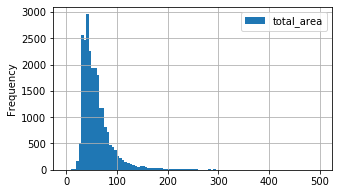

In [103]:
# изучим c использованием гистограмм общую площадь
df.plot(y ='total_area', kind ='hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

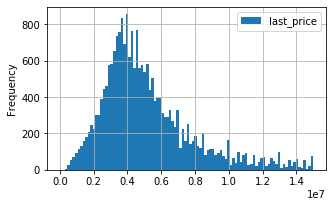

In [104]:
# изучим цену
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
df['last_price'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

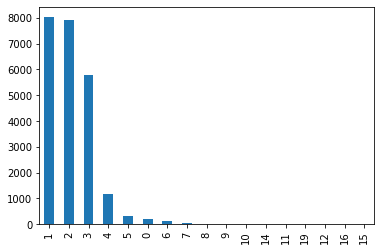

In [105]:
#изучим число комнат
#df.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
df['rooms'].value_counts().plot.bar()
df['rooms'].describe()


count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

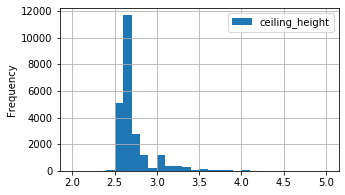

In [106]:
#изучим высоту потолков
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
df['ceiling_height'].describe()

**Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишим, сколько обычно занимает продажа. Ответим на вопрос: "Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"**

count    23650.000000
mean       169.222748
std        206.550577
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

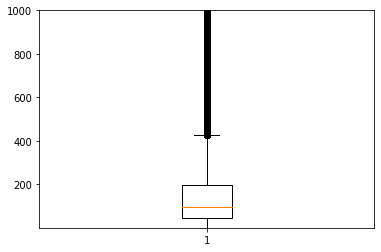

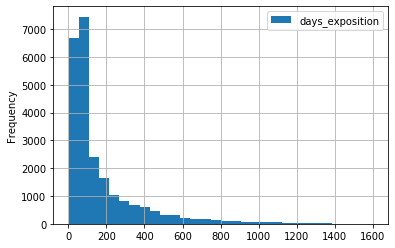

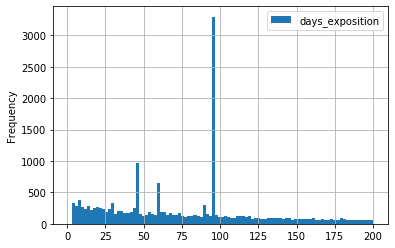

In [107]:
#диаграмма размаха
plt.boxplot(df[df['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
df[df['days_exposition']!=0]['days_exposition'].describe()

**Убераем редкие и выбивающиеся значения. Опишим, какие особенности обнаружили**

In [108]:
# попробуем найти аномалии с помощью инструментов визуализация данных
plt.style.use('ggplot')

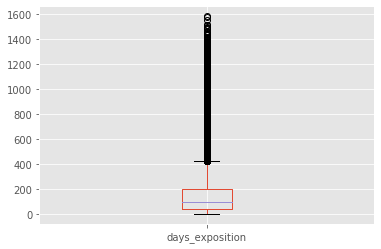

In [109]:
# используем диаграмму размаха
df['days_exposition'].plot(kind='box')
plt.show()

In [110]:
# устраним выявленные аномалии
days_df = df.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

count    21588.000000
mean       180.847462
std        212.477046
min          1.000000
25%         55.000000
50%         95.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

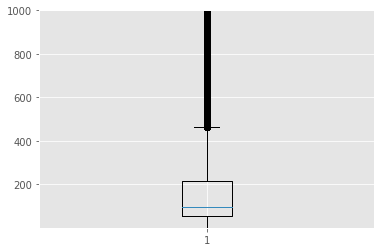

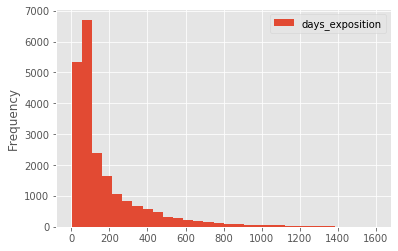

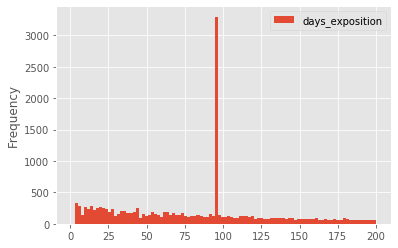

In [111]:
# диаграмма размаха
plt.boxplot(days_df['days_exposition'])
plt.ylim(1,1000)

#гистограммы
days_df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
days_df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
#good_data['days_exposition'].value_counts()
days_df['days_exposition'].describe()

**задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "**

0.3022016339711138

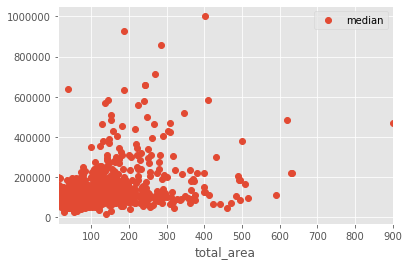

In [112]:
# используем в работе метод сводных таблиц для проведения расчетов по условиям задания
# рассмотрим корреляцию цены квадратного метра от общей площади квартиры
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['total_area'].corr(df['price_per_square_meter'])

0.055470370370160955

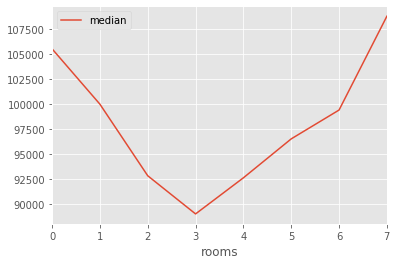

In [113]:
# Изучим зависимость цены квадратного метра от числа комнат.

pivot_table_rooms = df.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

df['rooms'].corr(df['price_per_square_meter'])

,mean,count,median
floor_category,,,
первый,81988.862637,2912,81236.5
последний,93388.355836,3333,87771.0


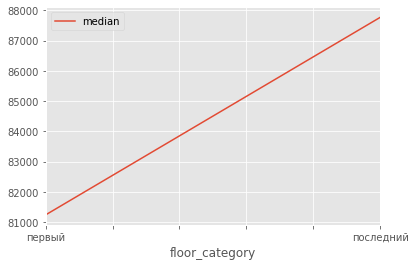

In [114]:
# рассмотрим зависимость цены квадратного метра от этажа (первого или последнего).
pivot_table_floor_category = df.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

-0.278292557982388

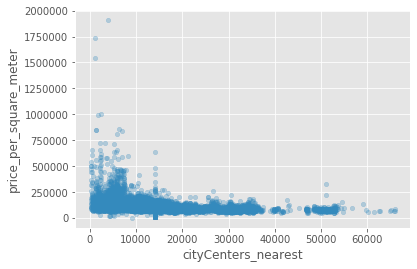

In [115]:
# зависимость цены квадратного метра от удалённости от центра.
df.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'cityCenters_nearest', alpha = 0.3)

df['cityCenters_nearest'].corr(df['price_per_square_meter'])

,mean,count,median
weekday_exposition,,,
1,99724.102036,4175,95634.0
2,99605.522945,3966,95473.0
3,100192.723985,4286,95152.0
0,99469.933167,3606,94703.0
4,98986.768788,3992,94607.5
6,97762.693262,1692,94594.0
5,99065.810140,1933,93548.0


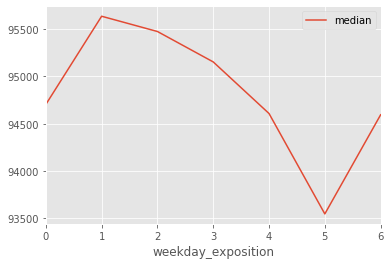

In [116]:
# зависимость цены квадратного метра от даты размещения: дня недели.
pivot_table_weekday_exposition = df.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

,mean,count,median
month_exposition,,,
4,101956.240624,2373,96451.0
8,100146.797359,1742,96102.5
11,99253.997043,2367,95625.0
9,100490.366347,1979,95608.0
3,98997.391170,2582,95293.0
1,99837.991952,1491,95209.0
7,99650.388757,1690,95023.5
2,98769.330049,2639,95000.0
12,99501.177656,1638,94238.0


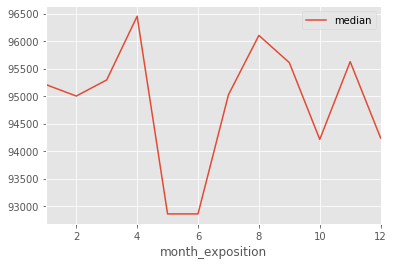

In [117]:
# определим зависимость цены квадратного метра от даты размещения: месяца.
pivot_table_month_exposition = df.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

,mean,count,median
year_exposition,,,
2014,124301.926471,136,106901.5
2019,107123.332060,2879,103305.0
2018,97799.615014,8512,95704.0
2015,104718.653026,1173,93396.0
2017,97636.917776,8185,92569.0
2016,98294.930561,2765,91666.0


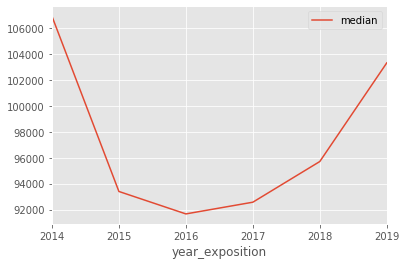

In [118]:
# рассмотрим зависимость цены квадратного метра от даты размещения: года.
pivot_table_year_exposition = df.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

**задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'**

In [119]:
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


In [120]:
# определим самую высокую стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231


In [121]:
# и самую низкую стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.489451


**задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.**

,price_per_square_meter
cityCenters_nearest_km,
0,187323.674419
1,166603.312500
2,146662.420195
3,129415.891635
4,137475.039691
5,146978.789337
6,152277.455319
7,141399.287469
8,120580.929851


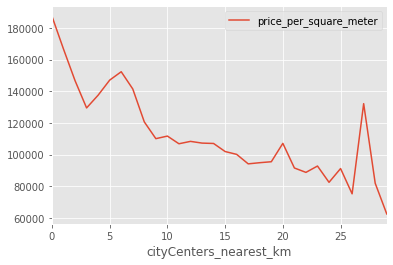

In [122]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(999999)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype(int)
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

**задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"**

In [123]:
# выделим квартиры в центре, беря за радиус 3 км
center_spb_data = df.query('cityCenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"')

0.0017673487141106204

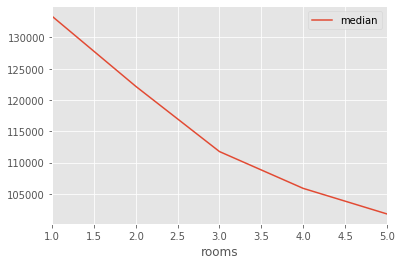

In [124]:
# определим зависимость стоимости квадратного метра от количества комнат.
center_spb_rooms = center_spb_data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')

center_spb_rooms.query('count > 50').sort_values('median', ascending = False)

center_spb_data['rooms'].corr(center_spb_data['price_per_square_meter'])

## Общий вывод

1. датафрейм после "лечения" стал пригодным для использования аналитических инструментов.
2. Проведена предообработка данных, главная проблема заключалась в большом количестве пропущенных значений.
3. В ходе проведения исследования изучены параметры: площадь, цена, число комнат, высота потолков. Результаты изучения приятно удивили их соответстсвием реалиям рынка.
4. Из представленных данных следует, что наибольшее количество квартир в Санкт-Петербурге и в пригородах вокруг него, приходится на однокомнатные квартиры, незначительно уступают двухкомнатные квартиры.
5. В подовляющем большинстве исследуемых квартир высота потолков составляет от 2,5 м до 3 м.
6. Из-за наличия аномалий в данных сложно определиться когда продажи очень быстро проходили, а когда необычно долго.
7. Величина площади квартиры незначительно влияет на стоимость.
8. Обнаружена закономерность, что квадратные метры падают в цене приближаясь к трем комнатам.
9. обнаружена закономерность, что чем выше этаж тем дороже квадратный метр, как правило квартиры на первом этаже дешевле квартир на последнем этаже - в среднем на 10%.
10. Обнаружена закономерность, что чем ближе к центру, тем выше стоимость квадратного метра.
11. Обнаружена закономерность, что чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость.Также заметно, что по субботам стоимость самая низкая.
12. самая высокая стоимость метра в апреле и августе. Самая низкая стоимость в мае и июне. На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости.
13. На рынке недвижимости СПБ с 2014 до 2016 года цена падала, но далее начала увеличиваться.
14. самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.
15. Все, что попадает в радиус трех км считается центром в Санкт-Петербурге.
16. В центре Санкт_Петербурга чем меньше комнат тем дороже стоимость метра квадратного, в отличие от всей выборки, где стоимость уменьшается в зависимости от близости количества комнат к 3. Данный результат соответсвует действительности.